## benhur dabre 
## roll-12

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [16]:
model = LinearRegression()
model.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
w = model.coef_[0]
b = model.intercept_
print(f"The slope is: {w} ")
print(f"The  is:intercept: {b} ")



The slope is: 1.4999999999999993 
The  is:intercept: 0.3333333333333348 


In [22]:
y_pred = model.predict(x)
print("\nPredicition for training data")
for xi, yi, ypi in zip(x.flatten(),y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")


Predicition for training data
x = 1, Actual y = 2, Predicted y = 1.8333333333333341
x = 2, Actual y = 3, Predicted y = 3.3333333333333335
x = 3, Actual y = 5, Predicted y = 4.833333333333333


## LR USING MLE

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.optimize import minimize

In [29]:
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [30]:
def neg_log_likelihood(params):
    w, p = params
    sigma2 = 1
    y_pred = w*x + b
    nll = 0.5*np.sum(y-y_pred)**2/sigma2
    return nll

In [31]:
initial_guess=[0, 0]

In [32]:
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"slope is {w_mle}")
print(f"intercept is {b_mle}")

slope is 1.4999999936468338
intercept is 0.0


In [33]:
y_pred = w_mle*x + b_mle
print("\npredicition for training data")
for xi,yi,ypi in zip (x.flatten(), y , y_pred):
    print(f"x = {xi}, Actual y = {yi},Predicted y = {ypi}")


predicition for training data
x = 1, Actual y = 2,Predicted y = [1.49999999]
x = 2, Actual y = 3,Predicted y = [2.99999999]
x = 3, Actual y = 5,Predicted y = [4.49999998]


In [35]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared_error is:{mse}")
print(f"R2_Score is:{r2}")


Mean Squared_error is:0.16666667513755526
R2_Score is:0.8928571374115716


## LR USING GD

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [41]:
w, b=0, 0
alpha = 0.001
n_iter = 10000
n = len(x)

In [45]:
for i in range(n_iter):
    y_pred = w* x.flatten() +b
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred) 
    w = w - alpha * dw
    b = b- alpha * db
print(f"slope is: {w}")
print(f" Bias is: {b}")

    

slope is: 1.4255937925924391
 Bias is: 0.5024761311596452


## LR USING GD WITH SINGLE PARAMETER

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])
n=len(x)


In [70]:
def loss(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y-y_pred)**2)

In [71]:
def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1*x + w0 
    return - 2*np.sum(x*(y-y_pred))

In [72]:
lr = 0.1 
w1 = 4
iter = 15
w1_values = []
loss_values = []

for i in range(iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr*grad

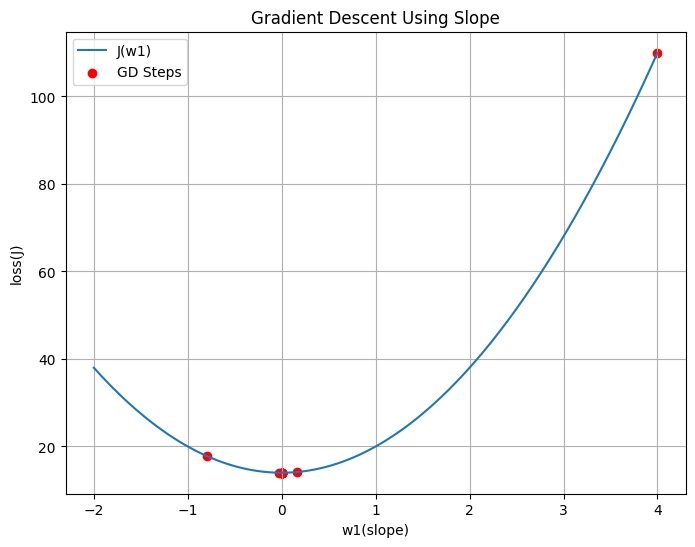

In [73]:
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize = (8 , 6))
plt.plot(w_space, loss_space, label= "J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="GD Steps")
plt.xlabel("w1(slope)")
plt.ylabel("loss(J)")
plt.title("Gradient Descent Using Slope")
plt.legend()
plt.grid(True)
plt.show()